In [1]:
import pandas as pd
import numpy as np
import requests
from astroquery.gaia import Gaia
from requests.packages.urllib3.exceptions import InsecureRequestWarning
import ssl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.io as pio

In [2]:
df = pd.read_csv("data/planetary_system.csv" , on_bad_lines='skip')

In [3]:
dtypes_df = pd.DataFrame(df.dtypes).reset_index()
dtypes_df.columns = ['Column', 'DataType']

pd.set_option('display.max_rows', None)  

print(dtypes_df)

pd.reset_option('display.max_rows')

             Column DataType
0           pl_name   object
1          hostname   object
2      default_flag    int64
3           sy_snum    int64
4           sy_pnum    int64
5   discoverymethod   object
6         disc_year    int64
7     disc_facility   object
8           soltype   object
9   pl_controv_flag    int64
10       pl_refname   object
11        pl_orbper  float64
12    pl_orbpererr1  float64
13    pl_orbpererr2  float64
14     pl_orbperlim  float64
15       pl_orbsmax  float64
16   pl_orbsmaxerr1  float64
17   pl_orbsmaxerr2  float64
18    pl_orbsmaxlim  float64
19          pl_rade  float64
20      pl_radeerr1  float64
21      pl_radeerr2  float64
22       pl_radelim  float64
23          pl_radj  float64
24      pl_radjerr1  float64
25      pl_radjerr2  float64
26       pl_radjlim  float64
27        pl_bmasse  float64
28    pl_bmasseerr1  float64
29    pl_bmasseerr2  float64
30     pl_bmasselim  float64
31        pl_bmassj  float64
32    pl_bmassjerr1  float64
33    pl_bmass

In [4]:
total_exoplanetas = df['pl_name'].nunique()
print(f"Número total de exoplanetas: {total_exoplanetas}")

Número total de exoplanetas: 5759


In [5]:
nombre_exoplaneta = input('Ingresar planeta: ')

Ingresar planeta:  K2-22 b


In [6]:
exoplaneta = df[df['pl_name'] == nombre_exoplaneta]
exoplaneta

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
4597,K2-22 b,K2-22,0,2,1,Transit,2015,K2,Published Candidate,0,...,-0.046,11.924,0.026,-0.026,14.9537,0.000777,-0.000777,2019-09-05,2019-09,2019-09-05
4598,K2-22 b,K2-22,0,2,1,Transit,2015,K2,Published Candidate,0,...,-0.046,11.924,0.026,-0.026,14.9537,0.000777,-0.000777,2016-06-09,2016-08,2016-06-09
4599,K2-22 b,K2-22,0,2,1,Transit,2015,K2,Published Confirmed,0,...,-0.046,11.924,0.026,-0.026,14.9537,0.000777,-0.000777,2017-10-23,2017-11,2017-10-26
4600,K2-22 b,K2-22,0,2,1,Transit,2015,K2,Published Confirmed,0,...,-0.046,11.924,0.026,-0.026,14.9537,0.000777,-0.000777,2015-10-07,2015-10,2015-10-15
4601,K2-22 b,K2-22,0,2,1,Transit,2015,K2,Published Candidate,0,...,-0.046,11.924,0.026,-0.026,14.9537,0.000777,-0.000777,2015-12-05,2016-01,2015-12-05
4602,K2-22 b,K2-22,0,2,1,Transit,2015,K2,Published Confirmed,0,...,-0.046,11.924,0.026,-0.026,14.9537,0.000777,-0.000777,2016-07-14,2016-09,2016-07-18
4603,K2-22 b,K2-22,1,2,1,Transit,2015,K2,Published Confirmed,0,...,-0.046,11.924,0.026,-0.026,14.9537,0.000777,-0.000777,2022-03-28,2021-08,2022-03-28


In [7]:
def buscar_exoplaneta(df, nombre_exoplaneta):
    exoplaneta = df[df['pl_name'] == nombre_exoplaneta]
    
    if not exoplaneta.empty:
        exoplaneta_confirmado = exoplaneta[exoplaneta['soltype'].str.contains('Published Confirmed', na=False)]
        
        if not exoplaneta_confirmado.empty:
            ultimo_exoplaneta = exoplaneta_confirmado.sort_values(by='rowupdate', ascending=False).iloc[0]
            sistema_planetario = exoplaneta['hostname'].nunique()
            return ultimo_exoplaneta, sistema_planetario
    return None, None

In [8]:
exoplaneta_info, sistema_planetario = buscar_exoplaneta(df, nombre_exoplaneta)

if exoplaneta_info is not None:
    print(exoplaneta_info)
    print(f'El exoplaneta {nombre_exoplaneta} pertenece al sistema planetario: {sistema_planetario}')
else:
    print(f'No se encontró el exoplaneta {nombre_exoplaneta}.')

pl_name              K2-22 b
hostname               K2-22
default_flag               1
sy_snum                    2
sy_pnum                    1
                     ...    
sy_gaiamagerr1      0.000777
sy_gaiamagerr2     -0.000777
rowupdate         2022-03-28
pl_pubdate           2021-08
releasedate       2022-03-28
Name: 4603, Length: 92, dtype: object
El exoplaneta K2-22 b pertenece al sistema planetario: 1


##GAIA SE ITNEGRA CON GAIA.LAUNCH()


In [125]:
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

def obtener_datos_gaia(ra, dec, rango=0.9):
    query = f"""
    SELECT *
    FROM gaiaedr3.gaia_source
    WHERE CONTAINS(
        POINT('ICRS', ra, dec),
        CIRCLE('ICRS', {ra}, {dec}, {rango})
    ) = 1
    """
    job = Gaia.launch_job(query)
    return job.get_results()


# Función para obtener estrellas dentro de un rango de paralaje (distancia)
def obtener_datos_gaia_por_paralaje(ra, dec, d_min, d_max, limite=10000):
    parallax_min = 1000 / d_max
    parallax_max = 1000 / d_min

    query = f"""
    SELECT ra, dec, parallax
    FROM gaiaedr3.gaia_source
    WHERE parallax BETWEEN {parallax_min} AND {parallax_max}
    AND 1=CONTAINS(
        POINT('ICRS', ra, dec),
        CIRCLE('ICRS', {ra}, {dec}, 10)  -- Ajustar la región de búsqueda, este valor cubre 10 grados
    )
    """
    job = Gaia.launch_job(query)
    return job.get_results()

# Función para obtener estrellas en un círculo definido por RA, Dec y un radio en grados
def obtener_datos_gaia_por_circulo(ra, dec, radio_grados, limite=10000):
    query = f"""
    SELECT ra, dec, parallax
    FROM gaiaedr3.gaia_source
    WHERE 1=CONTAINS(
        POINT('ICRS', ra, dec),
        CIRCLE('ICRS', {ra}, {dec}, {radio_grados})
    )
    """
    job = Gaia.launch_job(query)
    return job.get_results()

# Función para obtener estrellas en un círculo definido por RA, Dec y un radio en grados (limitado a 10 grados máximo)
def obtener_datos_gaia_por_circulo(ra, dec, radio_grados, limite=10000):
    # Verificamos que el radio esté dentro del límite permitido
    if radio_grados > 10:
        radio_grados = 10  # Limitar a 10 grados máximo para evitar errores
    
    query = f"""
    SELECT ra, dec, parallax
    FROM gaiaedr3.gaia_source
    WHERE 1=CONTAINS(
        POINT('ICRS', ra, dec),
        CIRCLE('ICRS', {ra}, {dec}, {radio_grados})
    )
    """
    job = Gaia.launch_job(query)
    return job.get_results()

# Función para realizar múltiples consultas en círculos concéntricos
def obtener_datos_gaia_en_circulos(ra_centro, dec_centro, radio_maximo=100, paso=10, limite=1000):
    resultados = []

    # Iterar sobre diferentes radios desde el centro, limitando el radio a 10 grados por consulta
    for radio in np.arange(0.5, radio_maximo + paso, paso):
        print(f"Consultando Gaia en un círculo de radio {radio} grados")
        datos = obtener_datos_gaia_por_circulo(ra_centro, dec_centro, radio_grados=radio, limite=limite)
        resultados.append(datos.to_pandas())

    # Combinar todos los resultados en un solo DataFrame
    if resultados:
        return pd.concat(resultados, ignore_index=True)
    else:
        return pd.DataFrame()


def obtener_datos_gaia_por_area(ra, dec, radio_grados=1, limite=10000):
    query = f"""
    SELECT ra, dec, parallax
    FROM gaiaedr3.gaia_source
    WHERE 1=CONTAINS(
        POINT('ICRS', ra, dec),
        CIRCLE('ICRS', {ra}, {dec}, {radio_grados})
    )
    """
    job = Gaia.launch_job(query)
    return job.get_results().to_pandas()



# Función para realizar consultas en un grid alrededor de una estrella objetivo
def obtener_datos_gaia_en_grid(ra_centro, dec_centro, radio_maximo=5, paso_grados=1, limite=10000):
    resultados = []

    # Definir los límites de la búsqueda en RA y Dec
    ra_min = ra_centro - radio_maximo
    ra_max = ra_centro + radio_maximo
    dec_min = dec_centro - radio_maximo
    dec_max = dec_centro + radio_maximo

    # Iterar sobre la cuadrícula de RA y Dec
    for ra in np.arange(ra_min, ra_max, paso_grados):
        for dec in np.arange(dec_min, dec_max, paso_grados):
            try:
                print(f"Consultando Gaia en RA={ra}, Dec={dec}, Radio={paso_grados} grados")
                datos = obtener_datos_gaia_por_area(ra, dec, radio_grados=paso_grados, limite=limite)
                resultados.append(datos)
            except Exception as e:
                print(f"Error consultando RA={ra}, Dec={dec}: {e}")

    # Combinar todos los resultados en un solo DataFrame
    if resultados:
        return pd.concat(resultados, ignore_index=True)
    else:
        return pd.DataFrame()




In [126]:

# Llamada a la función para obtener todos los datos alrededor de las coordenadas del exoplaneta
ra = exoplaneta['ra'].values[0]
dec = exoplaneta['dec'].values[0]
distancia= exoplaneta['sy_dist'].values[0]

# Definir el rango de distancias (en parsecs)
distancia_min = distancia - 100
distancia_max = distancia + 100

#gaia_data = obtener_datos_gaia_en_circulos(ra_exoplaneta, dec_exoplaneta, distancia_min, distancia_max)
#gaia_data = obtener_datos_gaia_en_circulos(ra_exoplaneta, dec_exoplaneta)
# Obtener los datos de Gaia en un grid alrededor del exoplaneta
gaia_dataa = obtener_datos_gaia_en_grid(ra_exoplaneta, dec_exoplaneta, radio_maximo=5, paso_grados=1)


# Visualizar o analizar los datos obtenidos
print(gaia_data)

Consultando Gaia en RA=164.4827046, Dec=-2.3809637, Radio=1 grados
Consultando Gaia en RA=164.4827046, Dec=-1.3809637000000001, Radio=1 grados
Consultando Gaia en RA=164.4827046, Dec=-0.3809637000000001, Radio=1 grados
Consultando Gaia en RA=164.4827046, Dec=0.6190362999999999, Radio=1 grados
Consultando Gaia en RA=164.4827046, Dec=1.6190362999999999, Radio=1 grados
Consultando Gaia en RA=164.4827046, Dec=2.6190363, Radio=1 grados
Consultando Gaia en RA=164.4827046, Dec=3.6190363, Radio=1 grados
Consultando Gaia en RA=164.4827046, Dec=4.619036299999999, Radio=1 grados
Consultando Gaia en RA=164.4827046, Dec=5.619036299999999, Radio=1 grados
Consultando Gaia en RA=164.4827046, Dec=6.619036299999999, Radio=1 grados
Consultando Gaia en RA=165.4827046, Dec=-2.3809637, Radio=1 grados
Consultando Gaia en RA=165.4827046, Dec=-1.3809637000000001, Radio=1 grados
Consultando Gaia en RA=165.4827046, Dec=-0.3809637000000001, Radio=1 grados
Consultando Gaia en RA=165.4827046, Dec=0.6190362999999999

In [127]:
if not exoplaneta.empty:
    ra_exoplaneta_exoplaneta = exoplaneta['ra'].values[0] 
    dec = exoplaneta['dec'].values[0]
    distancia = exoplaneta['sy_dist'].values[0]  

    print(f"Coordenadas del exoplaneta {nombre_exoplaneta}:")
    print(f"RA: {ra} grados, Dec: {dec} grados, Distancia: {distancia} parsecs")
else:
    print("Exoplaneta no encontrado.")  


Coordenadas del exoplaneta K2-22 b:
RA: 169.4827046 grados, Dec: 2.6190363 grados, Distancia: 243.836 parsecs


In [128]:
# Convertir coordenadas cartesianas centradas en el exoplaneta
def convertir_a_cartesianas(gaia_data_completa):
    gaia_data_completa['distancia_pc'] = 1000 / gaia_data_completa['parallax']  # Convertir paralaje a distancia en parsecs
    
    # Convertir RA y Dec a radianes
    gaia_data_completa['ra_rad'] = np.deg2rad(gaia_data_completa['ra'])
    gaia_data_completa['dec_rad'] = np.deg2rad(gaia_data_completa['dec'])

    # Coordenadas cartesianas
    r = gaia_data_completa['distancia_pc']
    theta = gaia_data_completa['ra_rad']
    phi = gaia_data_completa['dec_rad']

    gaia_data_completa['x'] = r * np.cos(phi) * np.cos(theta)
    gaia_data_completa['y'] = r * np.cos(phi) * np.sin(theta)
    gaia_data_completa['z'] = r * np.sin(phi)
    
    return gaia_data_completa


# Centramos el sistema de coordenadas en el exoplaneta
def centrar_en_exoplaneta(gaia_data_completa, ra_exoplaneta, dec_exoplaneta, distancia_exoplaneta):
    # Convertir RA y Dec del exoplaneta a radianes
    ra_exoplaneta_rad = np.deg2rad(ra_exoplaneta)
    dec_exoplaneta_rad = np.deg2rad(dec_exoplaneta)

    # Coordenadas cartesianas del exoplaneta
    x_exoplaneta = distancia_exoplaneta * np.cos(dec_exoplaneta_rad) * np.cos(ra_exoplaneta_rad)
    y_exoplaneta = distancia_exoplaneta * np.cos(dec_exoplaneta_rad) * np.sin(ra_exoplaneta_rad)
    z_exoplaneta = distancia_exoplaneta * np.sin(dec_exoplaneta_rad)

    # Restar las coordenadas del exoplaneta
    gaia_data_completa['x'] -= x_exoplaneta
    gaia_data_completa['y'] -= y_exoplaneta
    gaia_data_completa['z'] -= z_exoplaneta
    
    return gaia_data_completa

# Convertir a coordenadas cartesianas y centrar en el exoplaneta
gaia_data_completa = convertir_a_cartesianas(gaia_data)
gaia_data_completa = centrar_en_exoplaneta(gaia_data, ra_exoplaneta, dec_exoplaneta, distancia_exoplaneta)


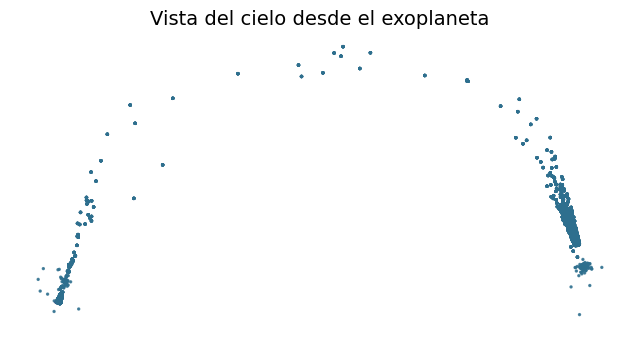

In [129]:
# Convertir de coordenadas cartesianas a esféricas (RA y Dec)
def convertir_a_esfericas(gaia_data_completa):
    # Coordenadas cartesianas
    x = gaia_data_completa['x']
    y = gaia_data_completa['y']
    z = gaia_data_completa['z']
    
    # Calcular la distancia radial (aunque no lo necesitaremos para la visualización)
    r = np.sqrt(x**2 + y**2 + z**2)
    
    # Calcular la ascensión recta (RA) en grados
    ra = np.rad2deg(np.arctan2(y, x))
    
    # Calcular la declinación (Dec) en grados
    dec = np.rad2deg(np.arcsin(z / r))
    
    # Devolver las coordenadas en esférico
    return ra, dec

# Convertir coordenadas cartesianas a esféricas
ra, dec = convertir_a_esfericas(gaia_data)

# Crear un gráfico 2D de RA vs Dec
plt.figure(figsize=(8, 6))
plt.scatter(ra, dec, c=gaia_data['distancia_pc'], cmap='viridis', s=2, alpha=0.8)

# Eliminar los ejes y etiquetas para simular un "cielo"
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_axis_off()  # Eliminar los ejes
plt.title("Vista del cielo desde el exoplaneta", fontsize=14)
plt.show()


In [130]:
def graficar_exoplaneta(exoplaneta, gaia_data):
    plt.figure(figsize=(10, 10))
    plt.scatter(gaia_data['ra'], gaia_data['dec'], color='blue', s=1, label='Estrellas de Gaia')
    plt.scatter(exoplaneta['ra'], exoplaneta['dec'], color='red', label='Exoplaneta')
    plt.title(f'Ubicación de {exoplaneta["pl_name"]}')
    plt.xlabel('RA (degrees)')
    plt.ylabel('Dec (degrees)')
    plt.legend()
    plt.grid()
    plt.show()


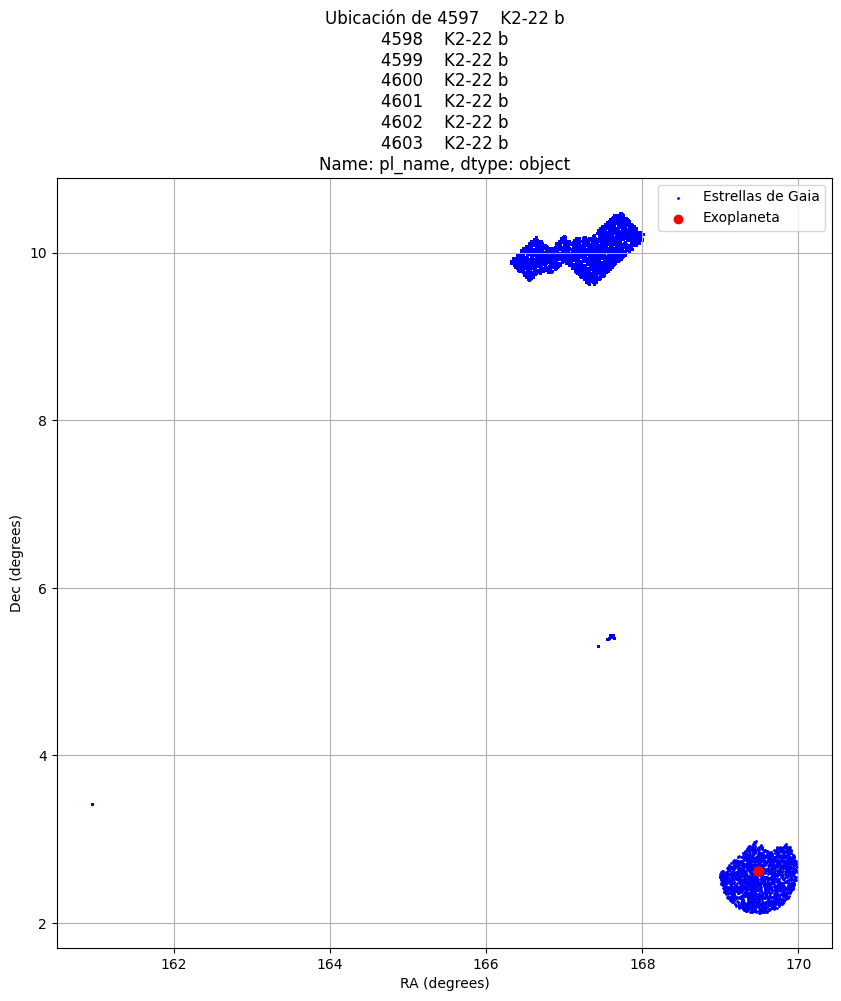

In [131]:
graficar_exoplaneta(exoplaneta,gaia_data)

In [107]:
#Ploteo 3d

gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')
print(gaiadr3_table)

for column in gaiadr3_table.columns:
  print(column.name)

#gaia_data['ra'], gaia_data['dec']

gaia_data['ra_deg']= np.deg2rad(gaia_data['ra'])
gaia_data['dec_deg']= np.deg2rad(gaia_data['dec'])


#print(gaia_data['ra_deg'], gaia_data['dec_deg'])


TAP Table name: gaiadr3.gaiadr3.gaia_source
Description: This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 152
solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pm
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrom

In [59]:
col1= gaia_data['ra']  #en deg
col2= gaia_data['dec'] #en deg
col3= gaia_data['parallax'] #en mas

print(col1, col2, col3)

        ra        
       deg        
------------------
 167.5704709058734
167.43587876668943
166.65579191841357
 166.6821127840643
 166.8523426059607
 166.5020306576269
 166.6106394071245
166.35098251478084
 166.3905466737673
               ...
161.89306014326843
161.89113739986033
165.74640929693192
165.75760568826544
 165.7210687301646
165.76058203544775
165.77876035576955
165.94227582480715
 165.9744966895483
165.90358672322725
Length = 2000 rows        dec        
       deg        
------------------
 5.400953976596351
 5.308636723007808
 9.799184889613077
 9.791231421155473
 9.855703250606656
 9.833228235925723
 9.894550456046236
 9.858451462710683
 9.905724590951998
               ...
 4.674304674578887
 4.683999871407368
11.764553168729494
 11.79020188387545
11.766654460595179
 11.81153243566128
 11.85056164009594
 11.76592072740916
11.777628111578672
11.797112528223382
Length = 2000 rows      parallax     
       mas        
------------------
 4.288678738129033
4.4162715369

In [44]:
# Convertir a coordenadas cartesianas centradas en el exoplaneta
def convertir_a_cartesianas(gaia_data):
    gaia_data['distancia_pc'] = 1000 / gaia_data['parallax']
    
    # Convertir RA y Dec a radianes
    gaia_data['ra_rad'] = np.deg2rad(gaia_data['ra'])
    gaia_data['dec_rad'] = np.deg2rad(gaia_data['dec'])

    # Coordenadas cartesianas
    r = gaia_data['distancia_pc']
    theta = gaia_data['ra_rad']
    phi = gaia_data['dec_rad']

    gaia_data['x'] = r * np.cos(phi) * np.cos(theta)
    gaia_data['y'] = r * np.cos(phi) * np.sin(theta)
    gaia_data['z'] = r * np.sin(phi)
    
    return gaia_data


def centrar_en_exoplaneta(gaia_data_completa, ra_exoplaneta, dec_exoplaneta, distancia_exoplaneta):
    ra_exoplaneta_rad = np.deg2rad(ra_exoplaneta)
    dec_exoplaneta_rad = np.deg2rad(dec_exoplaneta)

    # Coordenadas cartesianas del exoplaneta
    x_exoplaneta = distancia_exoplaneta * np.cos(dec_exoplaneta_rad) * np.cos(ra_exoplaneta_rad)
    y_exoplaneta = distancia_exoplaneta * np.cos(dec_exoplaneta_rad) * np.sin(ra_exoplaneta_rad)
    z_exoplaneta = distancia_exoplaneta * np.sin(dec_exoplaneta_rad)

    # Restar las coordenadas del exoplaneta
    gaia_data['x'] -= x_exoplaneta
    gaia_data['y'] -= y_exoplaneta
    gaia_data['z'] -= z_exoplaneta
    
    return gaia_data





In [48]:
# Visualizar las estrellas en un gráfico 3D

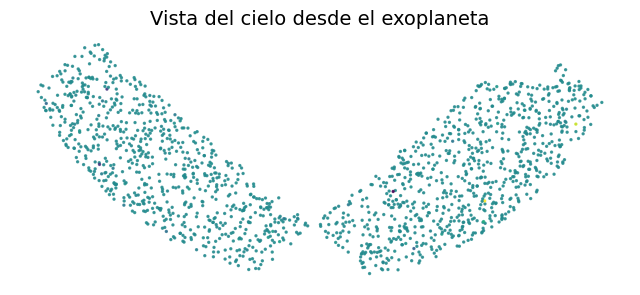

In [97]:


# Crear un gráfico 2D de RA vs Dec
plt.figure(figsize=(8, 6))
plt.scatter(gaia_data['ra'], gaia_data['dec'], c=gaia_data_completa['distancia_pc'], cmap='viridis', s=2, alpha=0.8)

# Eliminar los ejes y etiquetas para simular un "cielo"
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_axis_off()  # Eliminar los ejes
plt.title("Vista del cielo desde el exoplaneta", fontsize=14)
plt.show()

In [98]:
pio.renderers.default = 'browser'

def visualizar_en_3d(gaia_data_completa):
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=gaia_data_completa['x'], 
        y=gaia_data_completa['y'], 
        z=gaia_data_completa['z'], 
        mode='markers',
        marker=dict(
            size=2,
            color=gaia_data_completa['distancia_pc'],  # Colorear según la distancia
            colorscale='Viridis',
            opacity=0.8
        )
    ))

    fig.update_layout(
        title='Mapa 3D de estrellas alrededor del exoplaneta',
        scene=dict(
            xaxis_title='X (parsecs)',
            yaxis_title='Y (parsecs)',
            zaxis_title='Z (parsecs)',
            aspectmode='cube'
        )
    )

    fig.show()

# Convertir a coordenadas cartesianas y centrar en el exoplaneta
gaia_data = convertir_a_cartesianas(gaia_data)
gaia_data = centrar_en_exoplaneta(gaia_data, ra_exoplaneta, dec_exoplaneta, distancia_exoplaneta)

# Visualizar los datos en 3D
visualizar_en_3d(gaia_data)